In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from classifier import train_one_vs_all, predict_one_vs_all
from logistic_regression import logistic, nll_cost_function, gradient_descent


In [3]:
np_data = pd.read_csv('HNSC.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values

# age 
age = np_data[:,2].astype(int)

# gender
gender = np_data[:,3]
gender = np.array([l == 'FEMALE' for l in gender]).astype('int') #0 man, 1 woman

# ajcc_pathologic_tumor_stage
tumor_stage = np_data[:,4]
tumor_stage = np.where(tumor_stage=="Stage I", 0, tumor_stage)
tumor_stage = np.where(tumor_stage=="Stage II", 1, tumor_stage)
tumor_stage = np.where(tumor_stage=="Stage III", 2, tumor_stage)
tumor_stage = np.where(tumor_stage=="Stage IVA", 3, tumor_stage)
tumor_stage = np.where(tumor_stage=="Stage IVB", 4, tumor_stage)

# clinical_stage
clinical_stage = np_data[:,5]
clinical_stage = np.where(clinical_stage=="Stage I", 0, clinical_stage)
clinical_stage = np.where(clinical_stage=="Stage II", 1, clinical_stage)
clinical_stage = np.where(clinical_stage=="Stage III", 2, clinical_stage)
clinical_stage = np.where(clinical_stage=="Stage IVA", 3, clinical_stage)
clinical_stage = np.where(clinical_stage=="Stage IVB", 4, clinical_stage)
clinical_stage = np.where(clinical_stage=="Stage IVC", 5, clinical_stage)

# histological_type
histological_type = np_data[:,6] # ignore, they are all the same

# histological_grade
histological_grade = np_data[:,7] 
histological_grade = np.where(histological_grade=="G1", 0, histological_grade)
histological_grade = np.where(histological_grade=="G2", 1, histological_grade)
histological_grade = np.where(histological_grade=="G3", 2, histological_grade)
histological_grade = np.where(histological_grade=="G4", 3, histological_grade)
histological_grade = np.where(histological_grade=="GX", 4, histological_grade)

# initial_pathologic_dx_year
initial_pathologic_dx_year = np_data[:,8].astype(int)

# vital_status
vital_status = np_data[:,9]
vital_status = np.array([l == 'Alive' for l in vital_status]).astype('int') #0 Dead, 1 Alive

# tumor_status
tumor_status = np_data[:,10] 
tumor_status = np.array([l == 'WITH TUMOR' for l in tumor_status]).astype('int') #0 no tum, 1 with tum

# death_days_to
death_days_to = np_data[:, 11] 

# new_tumor_event_type
new_tumor_event_type = np_data[:,12] # N/A - 0, other - 1
new_tumor_event_type = np.array([l != '#N/A' for l in new_tumor_event_type]).astype('int') #0 no tum, 1 with tum

# new_tumor_event_site
new_tumor_event_site = np_data[:,13]
new_tumor_event_site = np.array([l != '#N/A' for l in new_tumor_event_site]).astype('int') #0 no tum, 1 with tum

#new_tumor_event_site_other

#new_tumor_event_dx_days_to
new_tumor_event_dx_days_to = np_data[:,15]
new_tumor_event_dx_days_to = np.where(new_tumor_event_dx_days_to=="#N/A", 0 , new_tumor_event_dx_days_to).astype(int)

# treatment_outcome_first_course

outcome = np_data[:,16];
outcome = np.where(outcome=="Complete Remission/Response", 0, outcome)
outcome = np.where(outcome=="Partial Remission/Response", 3, outcome)
outcome = np.where(outcome=="Progressive Disease", 2, outcome)
outcome = np.where(outcome=="Stable Disease", 1, outcome)
outcome = np.where(outcome=="Persistent Disease", 4, outcome)

m = np_data.shape[0]
X = np.stack([np.ones(m), age, gender, tumor_stage,histological_grade, clinical_stage, initial_pathologic_dx_year, tumor_status, new_tumor_event_type,new_tumor_event_site, new_tumor_event_dx_days_to], axis=1).astype(int)
n = X.shape[1]
print(X.shape)

(347, 11)


In [4]:
theta = np.ones(n)
iters = 200
y = vital_status
X = np.stack([np.ones(m), age, gender, tumor_stage,histological_grade, clinical_stage, initial_pathologic_dx_year, tumor_status, new_tumor_event_type,new_tumor_event_site, new_tumor_event_dx_days_to], axis=1).astype(int)

dead = np.nonzero(vital_status == 0)[0]
alive = np.nonzero(vital_status == 1)[0]
subset = np.concatenate([dead, alive[0:len(dead)] ])
np.random.shuffle(subset)

X = X[subset,:]
y = y[subset]

numTrain = 196
numTest = 48

train = np.arange(numTrain)
test  = numTrain + np.arange(numTest)

X_train = X[train,:]
y_train = y[train]

X_test  = X[test,:]
y_test  = y[test]

theta, J = gradient_descent(X_train, y_train, theta, 0.0001, iters)
y_predict = np.zeros(len(y_test))
correct_pred = 0
result = logistic(np.dot(X_test,theta))
y_predict =  np.where(result < 0.5, 0, result)
y_predict =  np.where(y_predict >= 0.5, 1, y_predict)

for i in range(len(y_test)):
    if  y_predict[i] == y_test[i]:
        correct_pred+=1

print("accuracy:", np.around(correct_pred/len(y_test)*100,2),"%")

accuracy: 58.33 %


C:\Users\Sofia\Desktop\QUARNOTES\Machine Learning\cancers\logistic_regression.py:14: RuntimeWarning: overflow encountered in power
  denum = ones_z.copy() + np.power(exp, -z)
C:\Users\Sofia\Desktop\QUARNOTES\Machine Learning\cancers\logistic_regression.py:32: RuntimeWarning: divide by zero encountered in log
  cost = -np.dot(y, np.log(h)) - np.dot((1-y), np.log(1 - h))


In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10e15, max_iter=1000, solver='liblinear')

y = vital_status
X = np.stack([np.ones(m), age, gender, tumor_stage,histological_grade, clinical_stage, initial_pathologic_dx_year, tumor_status, new_tumor_event_type,new_tumor_event_site, new_tumor_event_dx_days_to], axis=1).astype(int)

numTrain = 196
numTest = 48

dead = np.nonzero(vital_status == 0)[0]
alive = np.nonzero(vital_status == 1)[0]
subset = np.concatenate([dead, alive[0:len(dead)] ])

np.random.shuffle(subset)

X = X[subset,:]
y = y[subset]

print(X.shape)
train = np.arange(numTrain)
test  = numTrain + np.arange(numTest)

X_train = X[train,:]
y_train = y[train]

X_test  = X[test,:]
y_test  = y[test]

lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

correct_pred = 0
for i in range(len(prediction)):
    if  prediction[i] == y_test[i]:
        correct_pred+=1
cnf_matrix = confusion_matrix(y_test, prediction)

print("accuracy:", np.around(correct_pred/len(y_test)*100,2),"%")

(244, 11)
accuracy: 87.5 %


Text(0.5, 257.44, 'Predicted label')

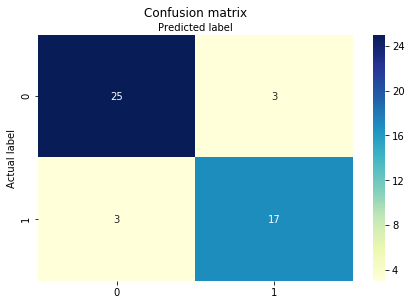

In [12]:
import seaborn as sns

class_names=[0, 1] # name  of classes
names = ["Dead", "Alive"]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, names)
plt.yticks(tick_marks, names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
# choose only dead ones 
dead = np.nonzero(vital_status == 0)[0] # indices of dead people
np.random.shuffle(dead)
y = death_days_to[dead].astype('int') # get all y's
X = np.stack([np.ones(m), age, gender, tumor_stage,histological_grade, clinical_stage, initial_pathologic_dx_year, tumor_status, new_tumor_event_type,new_tumor_event_site, new_tumor_event_dx_days_to], axis=1).astype(int)
X = X[dead, :]

print(X.shape)

numTrain    = 98
numTest     = 24

train = np.arange(numTrain)
test  = numTrain + np.arange(numTest)

X_train = X[train,:]
y_train = y[train]

X_test  = X[test,:]
y_test  = y[test]



(122, 11)


In [19]:
# regression
def gradient_descent( X, y, alpha, iters, theta=None ):

    m,n = X.shape
    
    if theta is None:
        theta = np.ones(n)
    
    J_history = np.ones(iters)

    for i in range(0, iters):
        
        theta = theta - np.dot(alpha*X.T, np.dot(X, theta) - y)
        J_history[i] = cost_function(X, y, theta)
    
    return theta, J_history

def cost_function(X, y, theta):  
    cost = 0
    diff = (np.dot(X,theta)-y).T
    diff = np.where(abs(diff) < 30, 0, diff)
    cost = 0.5*np.dot(diff, diff)
    return cost

def normalize( M ):
    norm_M = M.copy()
    mean = np.mean(M[:, 1:].copy(), axis = 0)
    std = np.array(np.std(M[:, 1:].copy(), axis = 0))
    norm_M[:,1:] = np.divide(np.subtract(norm_M[:,1:], mean), std)
    return norm_M

In [20]:
theta_vec_equations, cost = gradient_descent(normalize(X_train), y_train, 0.005, 40000)
print ("Cost function: %.2f" % cost[-1])
print(cost)

Cost function: 16616875.04
[22186635.811225   19622292.8942904  18505435.31179162 ...
 16616875.04059668 16616875.04059668 16616875.04059668]


In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

prediction = lin_reg.predict(X_test)
correct_pred = 0

for i in range(len(prediction)):
    if  prediction[i] <= y_test[i] + 150 and prediction[i] >= y_test[i] - 150:
        correct_pred+=1
        
print(correct_pred/len(prediction))

0.4166666666666667


In [28]:
'''
    Classification by the outcome
    
''' 

X = np.stack([np.ones(m), age, gender, tumor_stage, initial_pathologic_dx_year, tumor_status, new_tumor_event_type,new_tumor_event_site, new_tumor_event_dx_days_to], axis=1).astype(int)
y = outcome
numClasses = 2
numTrain = 55 
numTest = 13

class_1 = np.nonzero(y == 0)[0]   
class_2 = np.nonzero(y == 1)[0]   # ignoring this one
class_3 = np.nonzero(y == 2)[0]   
class_4 = np.nonzero(y == 3)[0]   # ignoring this one
class_5 = np.nonzero(y == 4)[0]   # ignoring this one

subset = np.concatenate([class_1[0:len(class_3)], class_3])
np.random.shuffle(subset)
X = X[subset,:]
y = y[subset]

# Split into test and train
train = np.arange(numTrain)
test  = numTrain + np.arange(numTest)

X_train = X[train,:]
y_train = y[train]

X_test  = X[test,:]
y_test  = y[test]



accuracy: 92.31 %


Text(0.5, 257.44, 'Predicted label')

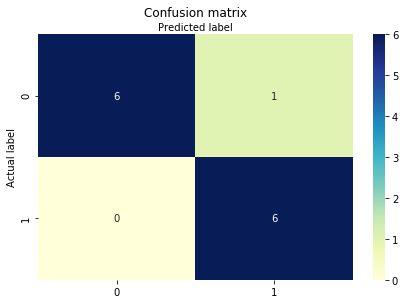

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10e15, max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train.astype('int'))
prediction = lr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

correct_pred = 0
for i in range(len(prediction)):
    if  prediction[i] == y_test[i]:
        correct_pred+=1
cnf_matrix = confusion_matrix(y_test.astype('int'), prediction)

print("accuracy:", np.around(correct_pred/len(y_test)*100,2),"%")
import seaborn as sns

class_names=[0, 1] # name  of classes
names = ["Dead", "Alive"]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, names)
plt.yticks(tick_marks, names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')